In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://www.football-data.co.uk/mmz4281/2021/E0.csv"

In [3]:
testfile = requests.get(url).content
df=pd.read_csv(io.StringIO(testfile.decode('utf-8')))
df.to_csv("england21.csv.csv")

In [4]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [5]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,16:00,Liverpool,Crystal Palace,2,0,H,1,0,...,3.49,-2.25,1.86,2.04,1.88,2.03,1.98,2.14,1.88,2.00
376,E0,23/05/2021,16:00,Man City,Everton,5,0,H,2,0,...,2.77,-1.75,2.01,1.89,1.99,1.89,2.20,2.00,2.03,1.85
377,E0,23/05/2021,16:00,Sheffield United,Burnley,1,0,H,1,0,...,2.05,0.00,2.04,1.86,2.05,1.86,2.17,1.90,2.03,1.84
378,E0,23/05/2021,16:00,West Ham,Southampton,3,0,H,2,0,...,2.14,-0.75,2.00,1.90,2.02,1.91,2.06,2.01,1.99,1.89


In [6]:
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date', 'Time'],axis=1)
# res_14 = df_14.ix[:,:23]

# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date', 'Time'],axis=1)
bet_16 = df.iloc[:,23:]

In [7]:
res_16.head()
feature_table = df.iloc[:,:23]

In [8]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
375,Liverpool,Crystal Palace,2,0,H,1,0,H,C Pawson,19,5,5,4,10,8,14,1,2,2,0
376,Man City,Everton,5,0,H,2,0,H,M Oliver,21,8,11,3,8,10,7,5,2,2,0
377,Sheffield United,Burnley,1,0,H,1,0,H,K Friend,12,10,3,3,11,1,8,9,3,1,0
378,West Ham,Southampton,3,0,H,2,0,H,M Atkinson,14,17,7,5,5,9,2,3,0,3,0
379,Wolves,Man United,1,2,A,1,2,A,M Dean,14,9,4,4,14,3,6,2,4,1,0


In [9]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [10]:
res_16 = res_16[:-10]
res_16.shape[0]

370

In [11]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.3324324324324324
Average number of goals away 1.3513513513513513
Average number of goals conceded at home 1.3513513513513513
Average number of goals conceded away 1.3324324324324324


In [12]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')
res_home.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,Fulham,Arsenal,0,3,A,0,1,A,C Kavanagh,5,13,2,6,12,12,2,3,2,2,0
1,Crystal Palace,Southampton,1,0,H,1,0,H,J Moss,5,9,3,5,14,11,7,3,2,1,0
2,Liverpool,Leeds,4,3,H,3,2,H,M Oliver,22,6,6,3,9,6,9,0,1,0,0
3,West Ham,Newcastle,0,2,A,0,0,D,S Attwell,15,15,3,2,13,7,8,7,2,2,0
4,West Brom,Leicester,0,3,A,0,0,D,A Taylor,7,13,1,7,12,9,2,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Arsenal,Wolves,1,2,A,1,2,A,M Oliver,13,11,2,5,13,13,8,4,3,4,0
96,Leicester,Fulham,1,2,A,0,2,A,S Hooper,16,10,3,5,9,21,6,5,0,2,0
97,West Ham,Aston Villa,2,1,H,1,1,D,P Bankes,6,16,2,6,20,7,3,7,1,1,0
98,Burnley,Everton,1,1,D,1,1,D,A Taylor,8,13,3,6,6,9,8,4,0,0,0


In [13]:
# list(res_home)[0]

In [14]:
table_16.Team = list(res_home.groups.keys())
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,22,31,NaN,NaN,21,18,NaN,NaN
1,Aston Villa,27,26,NaN,NaN,26,19,NaN,NaN
2,Brighton,22,18,NaN,NaN,22,22,NaN,NaN
3,Burnley,14,19,NaN,NaN,27,27,NaN,NaN
4,Chelsea,31,26,NaN,NaN,18,16,NaN,NaN
5,Crystal Palace,20,21,NaN,NaN,32,32,NaN,NaN
6,Everton,24,23,NaN,NaN,28,15,NaN,NaN
7,Fulham,9,18,NaN,NaN,26,25,NaN,NaN
8,Leeds,25,34,NaN,NaN,20,33,NaN,NaN
9,Leicester,32,34,NaN,NaN,26,20,NaN,NaN


In [15]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [16]:
table_16.Team = list(res_home.groups.keys())
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,22,31,0.892495,1.24,21,18,0.84,0.730223
1,Aston Villa,27,26,1.095335,1.04,26,19,1.04,0.770791
2,Brighton,22,18,0.892495,0.72,22,22,0.88,0.892495
3,Burnley,14,19,0.567951,0.76,27,27,1.08,1.095335
4,Chelsea,31,26,1.257606,1.04,18,16,0.72,0.649087
5,Crystal Palace,20,21,0.811359,0.84,32,32,1.28,1.298174
6,Everton,24,23,0.973631,0.92,28,15,1.12,0.608519
7,Fulham,9,18,0.365112,0.72,26,25,1.04,1.014199
8,Leeds,25,34,1.014199,1.36,20,33,0.80,1.338742
9,Leicester,32,34,1.298174,1.36,26,20,1.04,0.811359


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


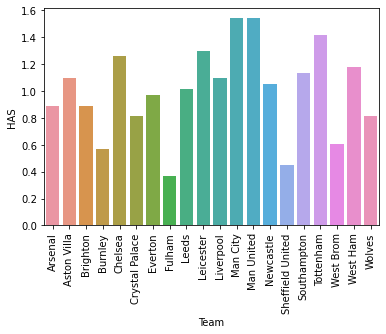

In [17]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [18]:
table_16[table_16.Team == "Southampton"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
15,Southampton,28,19,1.135903,0.76,25,40,1.0,1.622718


In [19]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [20]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Fulham,Arsenal,A,2,6,0.365112,1.04,1.24,0.730223
1,Crystal Palace,Southampton,H,3,5,0.811359,1.28,0.76,1.622718
2,Liverpool,Leeds,H,6,3,1.095335,0.80,1.36,1.338742
3,West Ham,Newcastle,A,3,2,1.176471,0.88,0.72,1.176471
4,West Brom,Leicester,A,1,7,0.608519,1.56,1.36,0.811359
5,Tottenham,Everton,A,5,4,1.419878,0.80,0.92,0.608519
6,Brighton,Chelsea,A,3,5,0.892495,0.88,1.04,0.649087
7,Sheffield United,Wolves,A,2,4,0.446247,1.08,0.60,1.095335
8,Everton,West Brom,H,7,4,0.973631,1.12,0.76,1.379310
9,Leeds,Fulham,H,7,6,1.014199,0.80,0.72,1.014199


In [21]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [22]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [23]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
360,Man United,Fulham,D,6,5,1.541582,1.12,0.72,1.014199,0
361,Southampton,Leeds,A,3,7,1.135903,1.00,1.36,1.338742,-1
362,Brighton,Man City,H,6,4,0.892495,0.88,1.60,0.608519,1
363,Chelsea,Leicester,H,6,3,1.257606,0.72,1.36,0.811359,1
364,Everton,Wolves,H,4,3,0.973631,1.12,0.60,1.095335,1
365,Newcastle,Sheffield United,H,5,1,1.054767,1.32,0.32,1.460446,1
366,Tottenham,Aston Villa,A,4,4,1.419878,0.80,1.04,0.770791,-1
367,Crystal Palace,Arsenal,A,6,3,0.811359,1.28,1.24,0.730223,-1
368,Burnley,Liverpool,A,4,3,0.567951,1.08,1.56,0.892495,-1
369,West Brom,West Ham,A,4,9,0.608519,1.56,1.20,1.014199,-1


In [24]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

In [26]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [27]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.64864865 0.56756757 0.51351351 0.62162162 0.56756757 0.64864865
 0.51351351 0.56756757 0.59459459 0.7027027 ]
0.5945945945945946


In [28]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())


[0.62162162 0.54054054 0.56756757 0.59459459 0.56756757 0.67567568
 0.59459459 0.56756757 0.62162162 0.72972973]
0.6081081081081081


In [29]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.59459459 0.64864865 0.62162162 0.62162162 0.67567568 0.56756757
 0.56756757 0.56756757 0.62162162 0.62162162]
0.6108108108108109


In [30]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)

print(scores.mean())

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:59:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.48648649 0.51351351 0.51351351 0.48648649 0.56756757 0.59459459
 0.45945946 0.48648649 0.59459459 0.59459459]
0.5297297297297299


In [31]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [32]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [33]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Man City','Leeds United','D',0,0,0,0,0,0],
                             ['Fulham','Wolves','D',0,0,0,0,0,0],
                             ['Liverpool','Aston Villa','D',0,0,0,0,0,0],
                             ['Cristal Palace','Chelsea','D',0,0,0,0,0,0],
                             ['Burnley','Newcastle','D',0,0,0,0,0,0],
                             ['West Ham','leicester City','D',0,0,0,0,0,0],
                             ['Tottenham','Man United','D',0,0,0,0,0,0],
                             ['Sheffield United','Southampton','D',0,0,0,0,0,0],
                             ['Brighton','Everton','D',0,0,0,0,0,0],
                             ['Everton','Tottenham','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [34]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(380, 9)

In [35]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [36]:
feat_table.head(18)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
379,Man City,Leeds United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
378,Fulham,Wolves,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
377,Liverpool,Aston Villa,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
376,Cristal Palace,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
375,Burnley,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
374,West Ham,leicester City,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
373,Tottenham,Man United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
372,Sheffield United,Southampton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
371,Brighton,Everton,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
370,Everton,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#  for index,row in feat_table.iterrows():
#         print(row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values)
# #         print(row['HomeTeam'], table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0]) #give Error


In [38]:
feat_table.dropna(axis='columns')

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
379,Man City,Leeds United,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
378,Fulham,Wolves,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
377,Liverpool,Aston Villa,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
376,Cristal Palace,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
375,Burnley,Newcastle,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,West Brom,Leicester,A,0,3,7,13,2,5,0.0,0.0,0.0,0.0,0.0,0.0
3,West Ham,Newcastle,A,0,2,15,15,8,7,0.0,0.0,0.0,0.0,0.0,0.0
2,Liverpool,Leeds,H,4,3,22,6,9,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Crystal Palace,Southampton,H,1,0,5,9,7,3,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# # Adding k recent performance metrics. Change value of k.
# k = 4
# for i in range(feat_table.shape[0]-1,-1,-1):
#     row = feat_table.loc[i]
#     ht = row.HomeTeam
#     at = row.AwayTeam
#     ht_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
#     at_stats = feat_table.loc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

#     feat_table.set_value(i, 'pastHC', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k)
#     feat_table.set_value(i, 'pastAC', (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k)
#     feat_table.set_value(i, 'pastHS', (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k)
#     feat_table.set_value(i, 'pastAS', (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k)
#     feat_table.set_value(i, 'pastHG', (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k)
#     feat_table.set_value(i, 'pastAG', (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k)

# f_HAS = []
# f_HDS = []
# f_AAS = []
# f_ADS = []
# for index,row in feat_table.iterrows():
#     #print row
#     f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
#     f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
#     f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
#     f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
# feat_table['HAS'] = f_HAS
# feat_table['HDS'] = f_HDS
# feat_table['AAS'] = f_AAS
# feat_table['ADS'] = f_ADS

In [48]:
# Adding k recent performance metrics. Change value of k.
k = 4
for i in range(feat_table.shape[0]-1,-1,-1):
    row = feat_table.iloc[i]
    ht = row.HomeTeam
    at = row.AwayTeam
    ht_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
    at_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

#     feat_table.loc[i, 'pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
#     feat_table.loc[i, 'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
#     feat_table.loc[i, 'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
#     feat_table.loc[i, 'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
#     feat_table.loc[i, 'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
#     feat_table.loc[i, 'pastAG'] = (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k
    

    
    
    
    #feat_table['pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
    #feat_table[i, 'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
    #feat_table[i, 'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
    #feat_table[i, 'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
    #feat_table[i, 'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
    #feat_table[i, 'pastAG'] = (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k
    
    
    feat_table.loc[i,'pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
    feat_table.loc[i, 'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
    feat_table.loc[i, 'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
    feat_table.loc[i, 'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
    feat_table.loc[i, 'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
    feat_table.loc[i, 'pastAG'] = (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k
    
   
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].index[:1])
    
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[:])
   
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[:])
   
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[:])
    

feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS
feat_table

<ipython-input-48-cc11767639cd>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ht_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
<ipython-input-48-cc11767639cd>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  at_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)


AttributeError: 'list' object has no attribute 'iloc'

In [227]:
# # Adding k recent performance metrics. Change value of k.
# k = 3
# for i in range(feat_table.shape[0]-1,-1,-1):
#     row = feat_table.iloc[i]
#     ht = row.HomeTeam
#     at = row.AwayTeam
#     ht_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
#     at_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

#     feat_table.loc[i,'pastHC'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k
#     feat_table.loc[i, 'pastAC'] = (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k
#     feat_table.loc[i, 'pastHS'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k
#     feat_table.loc[i, 'pastAS'] = (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k
#     feat_table.loc[i, 'pastHG'] = (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k
#     feat_table.loc[i, 'pastAG'] = (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k
    
# f_HAS = []
# f_HDS = []
# f_AAS = []
# f_ADS = []
# for index,row in feat_table.iterrows():
#     #print row
#     f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[:])
#     f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[:])
#     f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[:])
#     f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[:])
# feat_table['HAS'] = f_HAS
# feat_table['HDS'] = f_HDS
# feat_table['AAS'] = f_AAS
# feat_table['ADS'] = f_ADS
# feat_table

In [226]:
# # Adding k recent performance metrics. Change value of k.
# k = 4
# for i in range(feat_table.shape[0]-1,-1,-1):
#     row = feat_table.iloc[i]
#     ht = row.HomeTeam
#     at = row.AwayTeam
#     ht_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == ht) | (feat_table.AwayTeam == ht)].head(k)
#     at_stats = feat_table.iloc[i-1:-1][(feat_table.HomeTeam == at) | (feat_table.AwayTeam == at)].head(k)

#     feat_table.loc(i,'pastHC' = [i, (ht_stats[ht_stats["AwayTeam"] == ht].sum().HC + ht_stats[ht_stats["HomeTeam"] == ht].sum().HC)/k] 
#     feat_table.loc(i,'pastAC' = [i, (at_stats[at_stats["AwayTeam"] == at].sum().HC + at_stats[at_stats["HomeTeam"] == at].sum().HC)/k]
#     feat_table.loc(i,'pastHS' = [i, (ht_stats[ht_stats["AwayTeam"] == ht].sum().HS + ht_stats[ht_stats["HomeTeam"] == ht].sum().AS)/k]
#     feat_table.loc(i,',pastAS' = [i, (at_stats[at_stats["AwayTeam"] == at].sum().HS + at_stats[at_stats["HomeTeam"] == at].sum().AS)/k]
#     feat_table.loc(i,'pastHG' = [i, (ht_stats[ht_stats["AwayTeam"] == ht].sum().FTAG + ht_stats[ht_stats["HomeTeam"] == ht].sum().FTHG)/k]
#     feat_table.loc(i, 'pastAG' = [i, (at_stats[at_stats["AwayTeam"] == at].sum().FTAG + at_stats[at_stats["HomeTeam"] == at].sum().FTHG)/k]

# f_HAS = []
# f_HDS = []
# f_AAS = []
# f_ADS = []
# for index,row in feat_table.iterrows():
#     #print row
#     f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[:].astype(float, errors = 'raise')
#     f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[:])
#     f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[:])
#     f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[:])
    
# feat_table['HAS'] = f_HAS
# feat_table['HDS'] = f_HDS
# feat_table['AAS'] = f_AAS
# feat_table['ADS'] = f_ADS

In [192]:
# # feat_table.set_index('id', inplace=True)
# feat_table.set_index('id')

In [193]:
len(feat_table.index)

380

In [194]:
feat_table.columns

Index(['HomeTeam', 'AwayTeam', 'FTR', 'FTHG', 'FTAG', 'HS', 'AS', 'HC', 'AC',
       'pastHS', 'pastHC', 'pastAS', 'pastAC', 'pastHG', 'pastAG', 'HAS',
       'HDS', 'AAS', 'ADS'],
      dtype='object')

In [195]:
 test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)


In [199]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [200]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(380, 19)


370

In [201]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].iloc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].iloc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [202]:
### Try predictions here too.

In [203]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])/k
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])/k
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])/k

In [204]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

370


In [205]:
test_table = test_table.fillna(0)

In [206]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Fulham,Arsenal,A,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,[0.3651115618661258],[1.04],[0.7200000000000001],[1.0141987829614605],-1,0.000000,0.000000,0.000000
1,Crystal Palace,Southampton,H,8.000000,4.0,12.666667,5.666667,0.666667,0.000000,[0.8113590263691685],[1.28],[0.84],[1.2981744421906696],1,-0.555556,0.222222,2.666667
2,Liverpool,Leeds,H,6.666667,5.0,11.000000,3.666667,1.666667,1.333333,[1.0953346855983772],[0.8],[1.5599999999999998],[0.8924949290060853],1,0.444444,0.111111,1.777778
3,West Ham,Newcastle,A,0.000000,0.0,4.000000,5.000000,0.000000,0.666667,[1.1764705882352942],[0.8800000000000001],[1.2000000000000002],[1.0141987829614605],-1,-1.666667,-0.222222,-0.222222
4,West Brom,Leicester,A,12.000000,4.0,8.666667,3.000000,0.000000,1.333333,[0.6085192697768763],[1.5599999999999998],[0.76],[1.3793103448275863],-1,0.333333,-0.444444,3.555556


In [116]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [117]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
370,0.5625,0.2500,2.0625,[0.9736308316430021],[1.12],[0.92],[0.6085192697768763]
371,0.1875,0.2500,0.8125,[0.8924949290060853],[0.8800000000000001],[0.7200000000000001],[0.8924949290060853]
372,0.0000,-0.1250,0.5625,[0.44624746450304265],[1.08],[0.32],[1.4604462474645032]
373,0.0000,-0.1250,0.4375,[1.4198782961460448],[0.8],[1.16],[0.9330628803245437]
374,0.0000,-0.0625,0.8750,[1.1764705882352942],[0.8800000000000001],[1.2000000000000002],[1.0141987829614605]
375,0.0000,-0.1875,0.6250,[0.567951318458418],[1.08],[0.76],[1.0953346855983772]
376,0.0000,-0.1250,0.8125,[],[],[],[]
377,0.0000,0.0625,0.1875,[1.0953346855983772],[0.8],[1.5599999999999998],[0.8924949290060853]
378,0.0000,0.0625,0.5625,[0.3651115618661258],[1.04],[0.7200000000000001],[1.0141987829614605]
379,0.0000,0.0000,0.0000,[1.54158215010142],[0.68],[1.6],[0.6085192697768763]


In [118]:
# clf1.fit(X_train,y_train)
# #clf2.fit(X_train,y_train)
# clf3.fit(X_train,y_train)
# clf4.fit(X_train,y_train)
# clf5.fit(X_train,y_train)
# clf6.fit(X_train,y_train)

In [207]:
print(X_train.dtypes)

pastHS    float64
pastHC    float64
pastAS    float64
pastAC    float64
pastHG    float64
pastAG    float64
HAS        object
HDS        object
AAS        object
ADS        object
dtype: object


In [120]:
#KNN
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

#XGBClassifier
plot_scores_XGB = []
for i in range(1,100):
    clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
    clf_XGB.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_XGB.predict(X_test))
    plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.HAS, HDS, AAS, ADS

ValueError: x and y must have same first dimension, but have shapes (99,) and (0,)

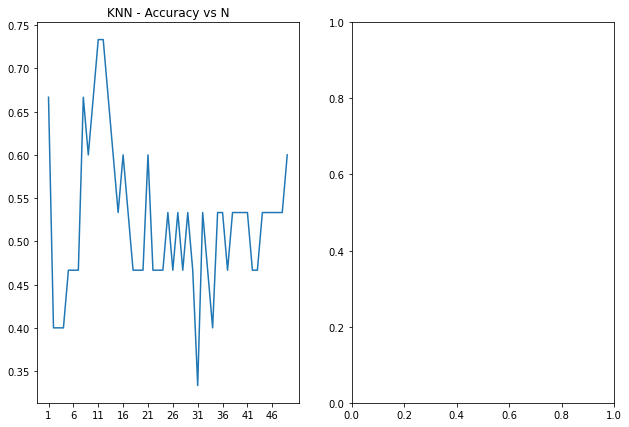

In [121]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

ax2 = fig.add_subplot(1,3,2)
ax2.plot(range(1,100),plot_scores_XGB);
ax2.set_xticks(range(1,100,6));
ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [122]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

max_XGB_e = max(plot_scores_XGB)
max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3

0.5333333333333333 8
0.6 1
0.4666666666666667 5


In [123]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

[03:53:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/thembajsph/Downloads/anaconda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [124]:
y_pred_knn = clf_knn.predict(X_predict)
y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [125]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [126]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_XGB,Result_logreg
300,Everton,Tottenham,-1,0,-1
301,Brighton,Everton,0,-1,1
302,Sheffield United,Southampton,-1,-1,-1
303,Tottenham,Man United,-1,0,1
304,West Ham,leicester City,-1,0,-1
305,Burnley,Newcastle,-1,-1,-1
306,Cristal Palace,Chelsea,1,0,1
307,Liverpool,Aston Villa,1,-1,-1
308,Fulham,Wolves,-1,0,-1
309,Man City,Leeds United,1,0,1


In [127]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [129]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn", "Result_XGB","Result_logreg"],axis=1,inplace=True)

In [130]:
print(max_knn_n, max_XGB_e, max_logreg_c)
this_week

0.5333333333333333 0.6 0.4666666666666667


,HomeTeam,AwayTeam,Res_knn,Res_XGB,Res_logreg
300,Everton,Tottenham,A,D,A
301,Brighton,Everton,D,A,H
302,Sheffield United,Southampton,A,A,A
303,Tottenham,Man United,A,D,H
304,West Ham,leicester City,A,D,A
305,Burnley,Newcastle,A,A,A
306,Cristal Palace,Chelsea,H,D,H
307,Liverpool,Aston Villa,H,A,A
308,Fulham,Wolves,A,D,A
309,Man City,Leeds United,H,D,H
